# Travel Package Purchase Prediction

# **Background and Context:**



You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


# **Objective:**

To predict which customer is more likely to purchase the newly introduced travel package.

# **Data Dictionary:**


### **Customer details**:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are * ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

### **Customer interaction data**: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer
* "Avg_Utilization_Ratio", "Months_on_book", "Credit_Limit", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1", "Total_Trans_Ct"


## Overview of the dataset 

**Let's start by importing libraries we need.**

In [4]:
# !pip install xgboost

import warnings
warnings.filterwarnings("ignore")


import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [142]:
#Loading dataset
data=pd.read_excel(open('Tourism.xlsx', 'rb'), sheet_name='Tourism')

**View the first 5 rows of the dataset.**

In [18]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Check data types and number of non-null values for each column.**

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that there are total of 20 columns and 4888 rows in the dataset.
- All columns' data type is either integer or float or object type.
- The number of non-null values of each column is not equal to the number of total rows for some columns in the dataset i.e. no null value. We can further confirm this using `isna()` method.

In [20]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

- There are 226 missing values for Age column in the data.
- There are 25 missing values for TypeofContact column in the data.
- There are 251 missing values for DurationOfPitch column in the data.
- There are 45 missing values for NumberOfFollowups column in the data.
- There are 26 missing values for PreferredPropertyStar column in the data.
- There are 140 missing values for NumberOfTrips column in the data.
- There are 66 missing values for NumberOfChildrenVisiting column in the data.
- There are 233 missing values for MonthlyIncome column in the data.

**Summary of the dataset**

In [21]:
# Summary of continuous columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- The mean value of 'Age' is approx 37
- The mean value for 'DurationOfPitch' is approx 15
- The mean value for 'NumberOfTrips' is approx 3
- The mean value for 'PitchSatisfactionScore' is approx 3
- The mean value for 'MonthlyIncome' is approx 23,600
- 'DurationOfPitch' has some extreme values 

**Number of unique values in each column**

In [22]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop 'CustomerID' column as it is an ID variable and will not add value to the model.

In [146]:
#Dropping two columns from the dataframe
data.drop(columns=['CustomerID'], inplace=True)
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Taking Care of the Categorical Data

In [24]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [25]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

In [143]:
# there is a typing error in Gender column
data[data["Gender"] == "Fe Male"]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
22,200022,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,3.0,Standard,4.0,Unmarried,1.0,0,3,1,0.0,Senior Manager,26994.0
55,200055,0,33.0,Company Invited,1,6.0,Salaried,Fe Male,3,3.0,Standard,3.0,Unmarried,2.0,1,2,1,0.0,Senior Manager,28458.0
116,200116,0,34.0,Self Enquiry,1,11.0,Small Business,Fe Male,2,4.0,Standard,5.0,Unmarried,3.0,0,2,0,0.0,Senior Manager,26631.0
131,200131,0,50.0,Company Invited,3,18.0,Small Business,Fe Male,3,3.0,Standard,3.0,Unmarried,5.0,0,5,0,0.0,Senior Manager,24208.0
154,200154,0,32.0,Company Invited,3,14.0,Small Business,Fe Male,2,3.0,Standard,3.0,Unmarried,2.0,0,4,1,1.0,Senior Manager,23998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,204795,0,33.0,Company Invited,1,9.0,Salaried,Fe Male,3,4.0,Deluxe,3.0,Unmarried,6.0,1,5,1,1.0,Manager,23676.0
4810,204810,0,32.0,Self Enquiry,1,31.0,Small Business,Fe Male,4,5.0,Deluxe,5.0,Unmarried,3.0,0,5,1,1.0,Manager,25490.0
4811,204811,0,60.0,Self Enquiry,3,10.0,Salaried,Fe Male,3,5.0,Deluxe,3.0,Unmarried,7.0,0,3,0,1.0,Manager,23849.0
4817,204817,1,30.0,Company Invited,1,17.0,Salaried,Fe Male,3,5.0,Basic,3.0,Unmarried,3.0,0,4,1,1.0,Executive,25301.0


In [144]:
# fixing typing error
data.Gender = data.Gender.apply(lambda x: "Female" if x == "Fe Male" else x)

**Number of observations in each category**

In [145]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executive         1842
Man

- The number of observations from TypeofContact Self Enquiry (3444) is much more than Company Invited (1419) 
- We have only  observations where Free Lancer=2 from Occupation column and most common is Salaried or Small Business.


## EDA

### Univariate analysis

In [35]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observations on Age**

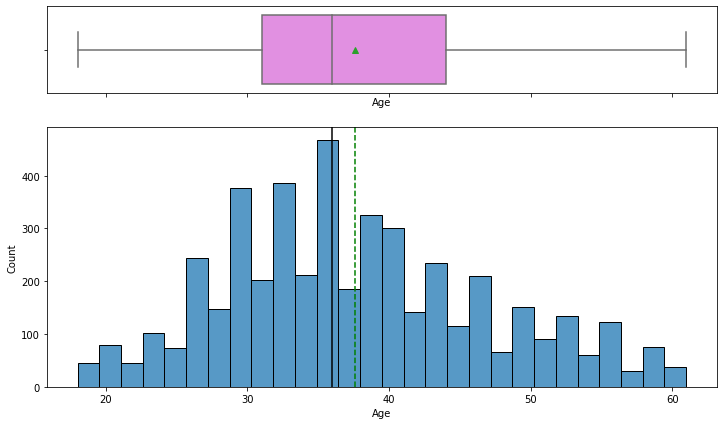

In [37]:
histogram_boxplot(data, "Age")

- The Age has an approx symmetric distribution with mean 37
- As evident from the boxplot, there are no outliers in the distribution for this variable

**Observations on 'DurationOfPitch'**

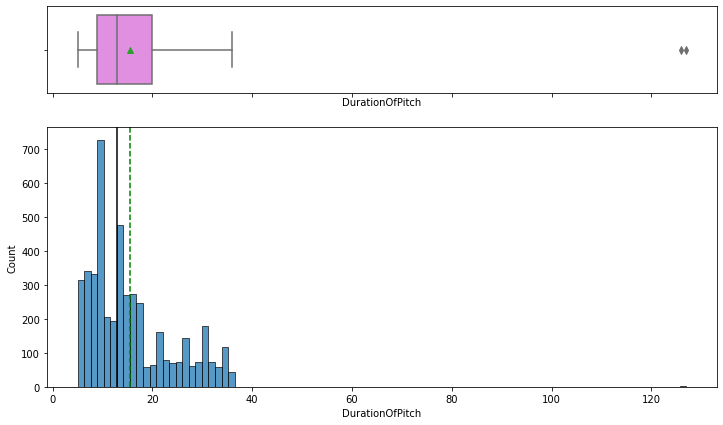

In [38]:
histogram_boxplot(data, "DurationOfPitch")

- DurationOfPitch is not symmetrically distributed, so right scewed.
- There are some outliers in the distribution of these variables

**Observations on 'NumberOfTrips'**

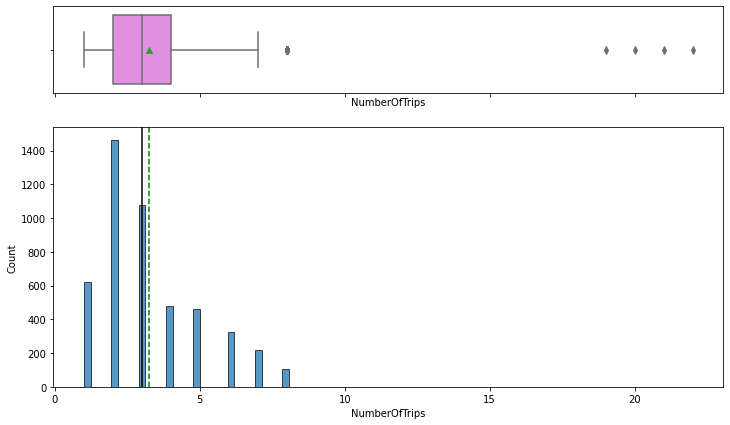

In [43]:
histogram_boxplot(data,"NumberOfTrips")

- NumberOfTrips is not symmetrically distributed, so right scewed.
- There are some outliers in the distribution of these variables
- Mean of the NumberOfTrips is approx 3

**Observations on 'MonthlyIncome'**

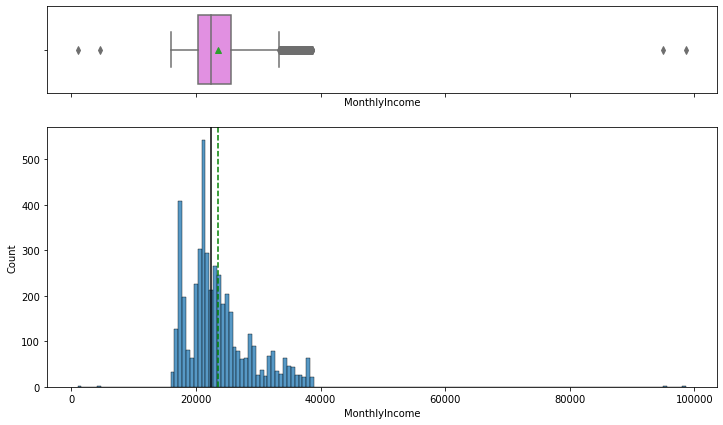

In [44]:
histogram_boxplot(data,'MonthlyIncome')

In [48]:
#Top 5 highest values 
data['MonthlyIncome'].nlargest()

2482    98678.0
38      95000.0
2634    38677.0
4104    38677.0
3190    38651.0
Name: MonthlyIncome, dtype: float64

- MonthlyIncome has a right-skewed distribution
- Distribution is not symmetric but mean is approx 23000
- The range of values is very large with many observations being less than 1000 and some being greater than 98000
- There are many outliers in this variable

**Observations on 'CityTier'**

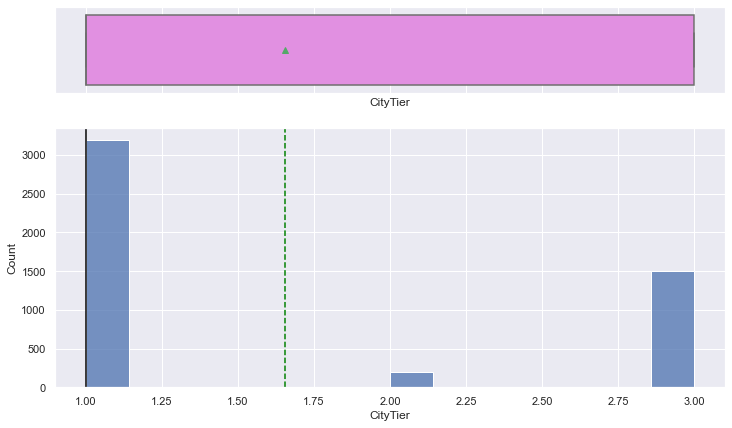

In [88]:
histogram_boxplot(data,'CityTier')

- CityTier has a right-skewed distribution
- Distribution is not symmetric but mean is approx 1.7

**Observations on 'NumberOfPersonVisiting'**

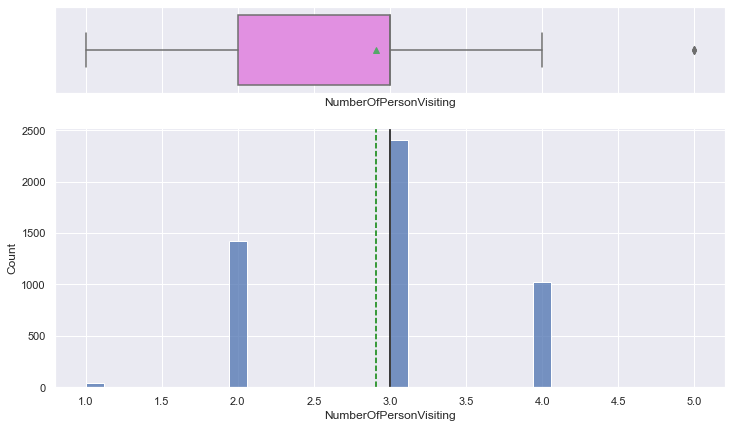

In [89]:
histogram_boxplot(data,'NumberOfPersonVisiting')

- NumberOfPersonVisiting seems normal distribution
- Distribution is symmetric and mean is approx 2.9
- Seems There is some low outliers of this variables.

**Observations on 'NumberOfFollowups'**

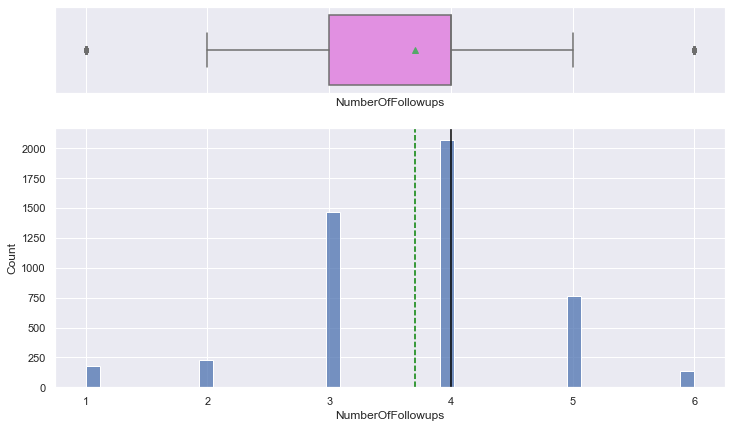

In [91]:
histogram_boxplot(data,'NumberOfFollowups')

- NumberOfFollowups seems normal distribution
- Distribution is symmetric and mean is approx 3.7
- Seems There is some low and high outliers of this variables.

**Observations on 'PreferredPropertyStar'**

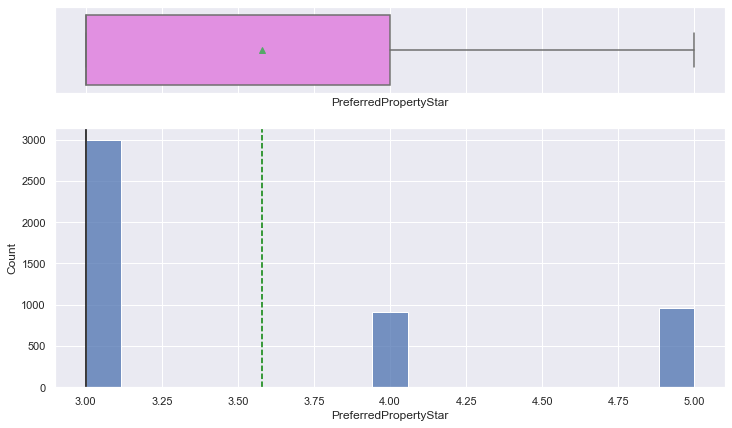

In [94]:
histogram_boxplot(data,'PreferredPropertyStar')

- PreferredPropertyStar has a right-skewed distribution
- Distribution is not symmetric but mean is approx 3.5
- There is no outliers in this variable

**Observations on 'NumberOfTrips'**

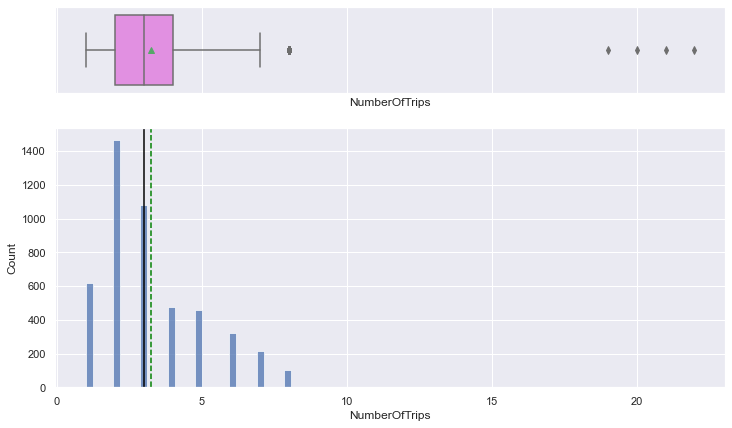

In [95]:
histogram_boxplot(data,'NumberOfTrips')

- NumberOfTrips has a right-skewed distribution
- Distribution is not symmetric but mean is approx 3.2
- There are some high outliers in this variable

**Observations on 'PitchSatisfactionScore'**

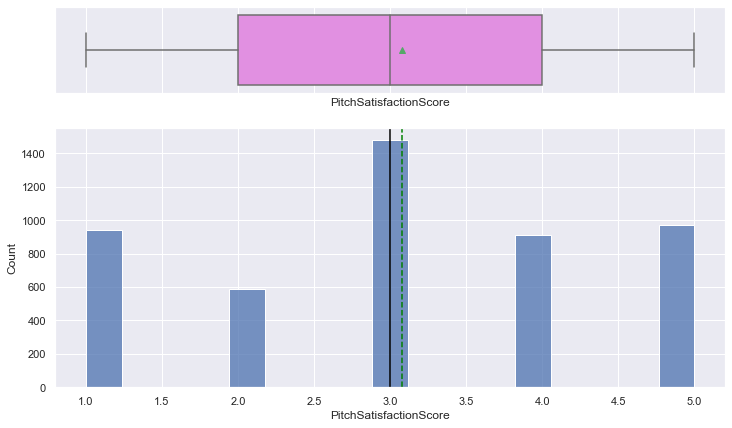

In [97]:
histogram_boxplot(data,'PitchSatisfactionScore')

- PitchSatisfactionScore has normal distribution
- Distribution is symmetric and mean is approx 3
- There no outliers in this variable

**Observations on 'NumberOfChildrenVisiting'**

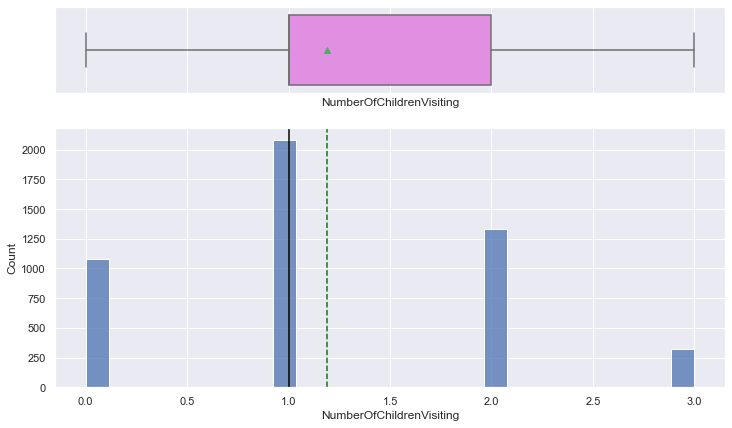

In [102]:
histogram_boxplot(data,'NumberOfChildrenVisiting')

- NumberOfChildrenVisiting has normal distribution
- Distribution is symmetric and mean is approx 1
- There no outliers in this variable

**Function to create barplots that indicate percentage for each category**

In [49]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [51]:
cat_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

**Observations on 'Passport'**

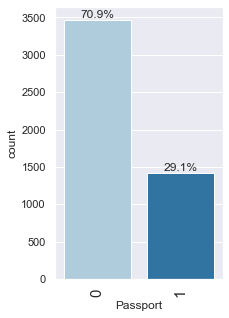

In [99]:
labeled_barplot(data, "Passport",perc=True)

- 70.9% of Costumer has no Passport

**Observations on 'OwnCar'**

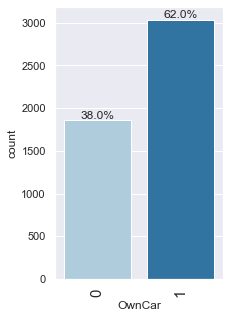

In [100]:
labeled_barplot(data, "OwnCar",perc=True)

- 62% of Costumer has car.
- 38% of Costumer has no car.

**Observations on 'TypeofContact'**

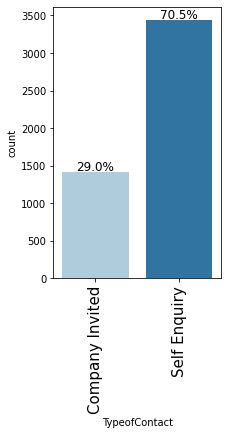

In [52]:
labeled_barplot(data, "TypeofContact",perc=True)

- Self Enquiry is 70.5% observations in the data

**Observations on 'Occupation'**

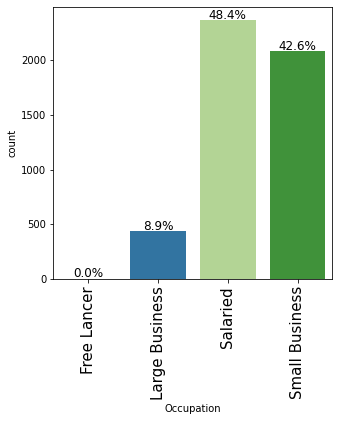

In [53]:
labeled_barplot(data,'Occupation',perc=True)

- Salaried and Small Business observation is most common occupations of the costumer portfolio, 48.4% and 42.6% respectively

**Observations on 'Gender'**

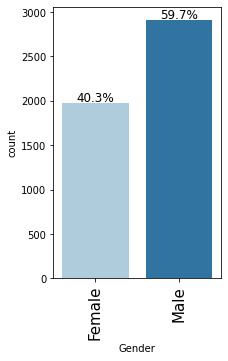

In [54]:
labeled_barplot(data,'Gender',perc=True)

- Major sex of the comstumer portfolio is Male and about 60%

**Observations on 'MaritalStatus'**

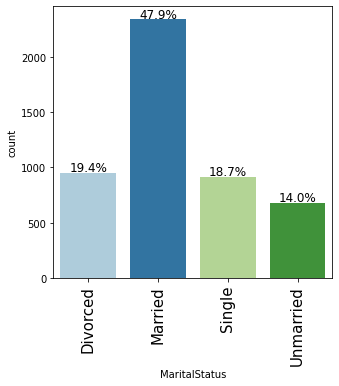

In [55]:
labeled_barplot(data,'MaritalStatus',perc=True)

- Majority of the costumer marital status is Married and almost 50%

**Observations on 'Designation'**

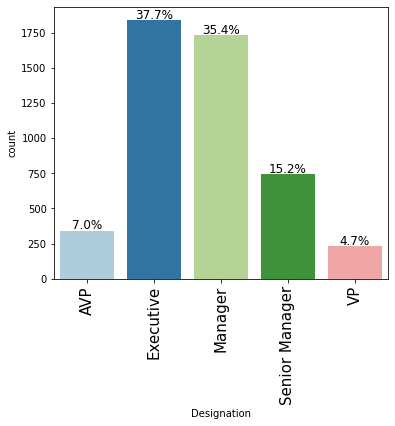

In [56]:
labeled_barplot(data,'Designation',perc=True)

- Executive and Manager has the highest percentage of observations respectively 37.7% and 35.4%.

**Observations on 'ProductPitched'**

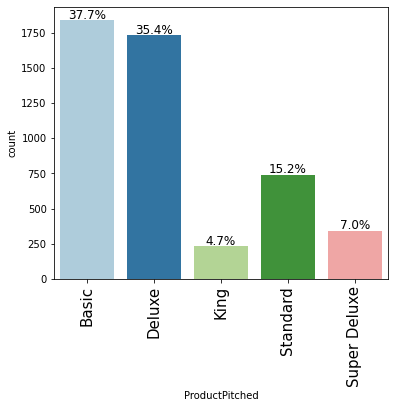

In [57]:
labeled_barplot(data,'ProductPitched',perc=True)

- Basic and Deluxe packages have the highest percentage of observations respectively 37.7% and 35.4%
- ProductPitched reulst seems excatly the same distribution as Designation

### Bivariate analysis

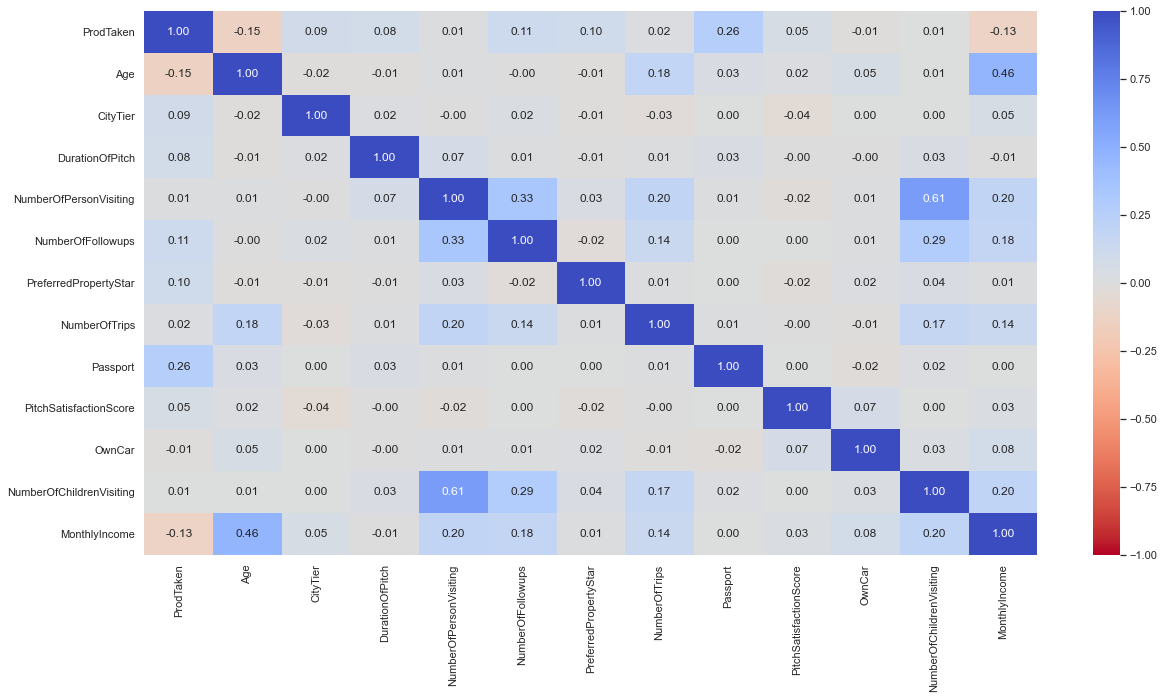

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="coolwarm_r")
plt.show()

- looks like NumberOfPersonVisiting and NumberOfChildrenVisiting has meaningfull correlations to each other.
- Age and MonthlyIncome is not strong but kind of correlated to each other. 

In [59]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [60]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [73]:
# contingency tables catg vs catg
def get_ct(df, var):
    ct_res = pd.crosstab(df[var], df["ProdTaken"], margins=True)
    ct_res["Accepted %"] = round((ct_res[1] / ct_res["All"]) * 100, 2)
    return ct_res.drop("All", axis=1)


def get_strat_ct(df, strat_var, var):
    ct_res = pd.crosstab(
        index=[df[strat_var], df[var]], columns=df["ProdTaken"], margins=True
    )
    ct_res["Accepted %"] = round(ct_res[1] / ct_res["All"] * 100, 2)
    return ct_res.drop(columns="All").drop("All", level=0)

**'TypeofContact' vs 'ProdTaken'**

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


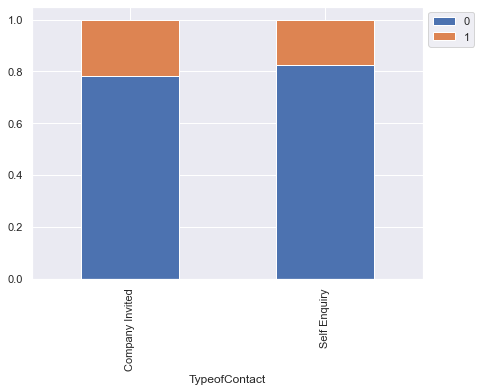

In [64]:
stacked_barplot(data, 'TypeofContact' , 'ProdTaken' )

In [75]:
get_ct(data, "TypeofContact")

ProdTaken,0,1,Accepted %
TypeofContact,,,
Company Invited,1109,310,21.85
Self Enquiry,2837,607,17.62
All,3946,917,18.86


- 21.85% of costumer who is Company Invited purchased one of the vacation package
- 17.62 % of costumer who is Self Enquiry  purchased one of the vacation package
- Overall 18.86% of costumers who has TypeofContact the  purchased one of the vacation package

**'Occupation' vs 'ProdTaken'**

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


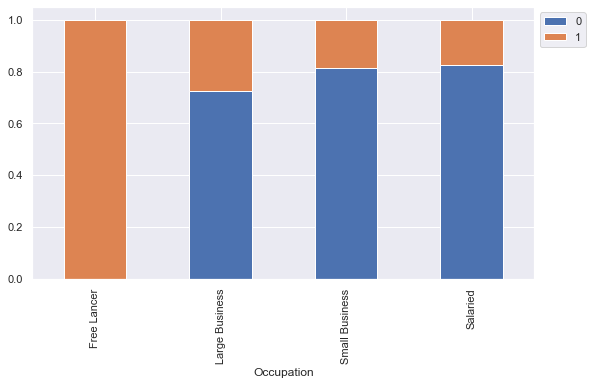

In [76]:
stacked_barplot(data, 'Occupation' , 'ProdTaken' )

In [77]:
get_ct(data, "Occupation")

ProdTaken,0,1,Accepted %
Occupation,,,
Free Lancer,0,2,100.00
Large Business,314,120,27.65
Salaried,1954,414,17.48
Small Business,1700,384,18.43
All,3968,920,18.82


- 27.65% of costumer who has a Large Business purchased one of the vacation package
- 17.48 % of costumer who is Salaried person purchased one of the vacation package
- 18.43 % of costumer who has a Small Business purchased one of the vacation package
- 100 % of costumer who is Freelancer purchased one of the vacation package but there is only 2 freelancer in dataset.

**'Gender' vs 'ProdTaken'**

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


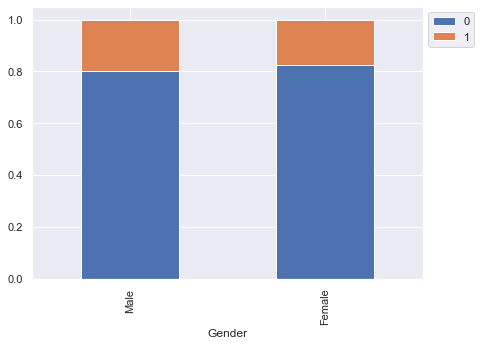

In [78]:
stacked_barplot(data, 'Gender' , 'ProdTaken' )

In [79]:
get_ct(data, "Gender")

ProdTaken,0,1,Accepted %
Gender,,,
Female,1630,342,17.34
Male,2338,578,19.82
All,3968,920,18.82


- 17.34% of Female costumers purchased one of the vacation package
- 19.82 % of Male costumers purchased one of the vacation package

**'MaritalStatus' vs 'ProdTaken'**

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


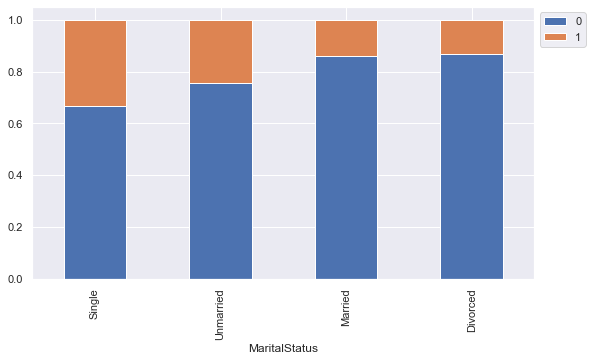

In [81]:
stacked_barplot(data, 'MaritalStatus' , 'ProdTaken' )

In [82]:
get_ct(data, "MaritalStatus")

ProdTaken,0,1,Accepted %
MaritalStatus,,,
Divorced,826,124,13.05
Married,2014,326,13.93
Single,612,304,33.19
Unmarried,516,166,24.34
All,3968,920,18.82


- 13.05% of Divorced costumers purchased one of the vacation package
- 13.93 % of Married costumers purchased one of the vacation package
- 33.19% of Single costumers purchased one of the vacation package
- 24.34 % of Unmarried costumers purchased one of the vacation package

**'Designation' vs 'ProdTaken'**

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


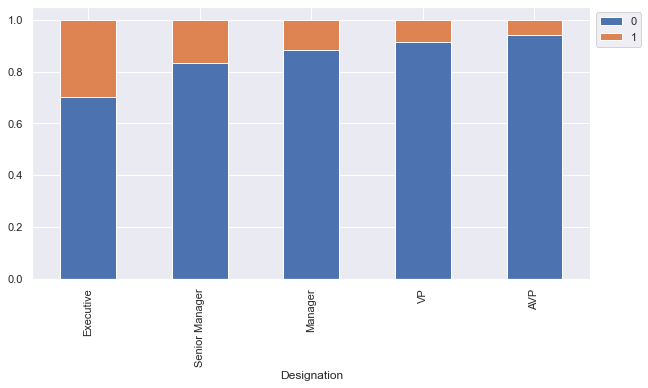

In [83]:
stacked_barplot(data, 'Designation' , 'ProdTaken' )

In [84]:
get_ct(data, "Designation")

ProdTaken,0,1,Accepted %
Designation,,,
AVP,322,20,5.85
Executive,1290,552,29.97
Manager,1528,204,11.78
Senior Manager,618,124,16.71
VP,210,20,8.70
All,3968,920,18.82


- 5.85% of costumers whose designation is AVP has purchased one of the vacation package
- 29.97% of costumers whose designation is Executive has purchased one of the vacation package
- 11.78% of costumers whose designation is Manager has purchased one of the vacation package
- 16.71% of costumers whose designation is Senior Manager has purchased one of the vacation package
- 8.70% of costumers whose designation is VP has purchased one of the vacation package

**'ProductPitched' vs 'ProdTaken'**

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


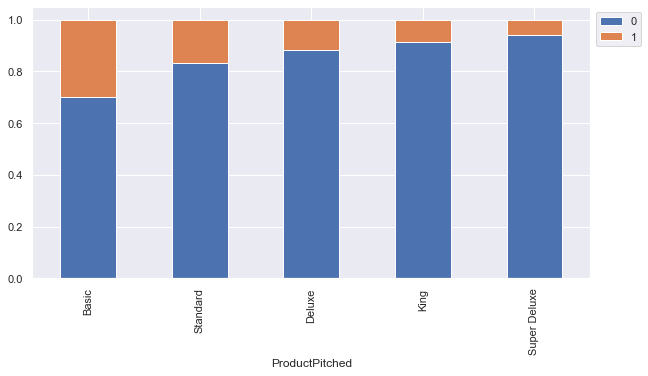

In [85]:
stacked_barplot(data, 'ProductPitched' , 'ProdTaken' )

In [86]:
get_ct(data, "ProductPitched")

ProdTaken,0,1,Accepted %
ProductPitched,,,
Basic,1290,552,29.97
Deluxe,1528,204,11.78
King,210,20,8.70
Standard,618,124,16.71
Super Deluxe,322,20,5.85
All,3968,920,18.82


- 29.97% of costumers has purchased Basic package
- 11.78% of costumers has purchased Deluxe package
- 8.70% of costumers has purchased King package
- 16.71% of costumers has purchased Standard package
- 5.85% of costumers has purchased Super Deluxe package

**'Age' vs 'ProdTaken'**

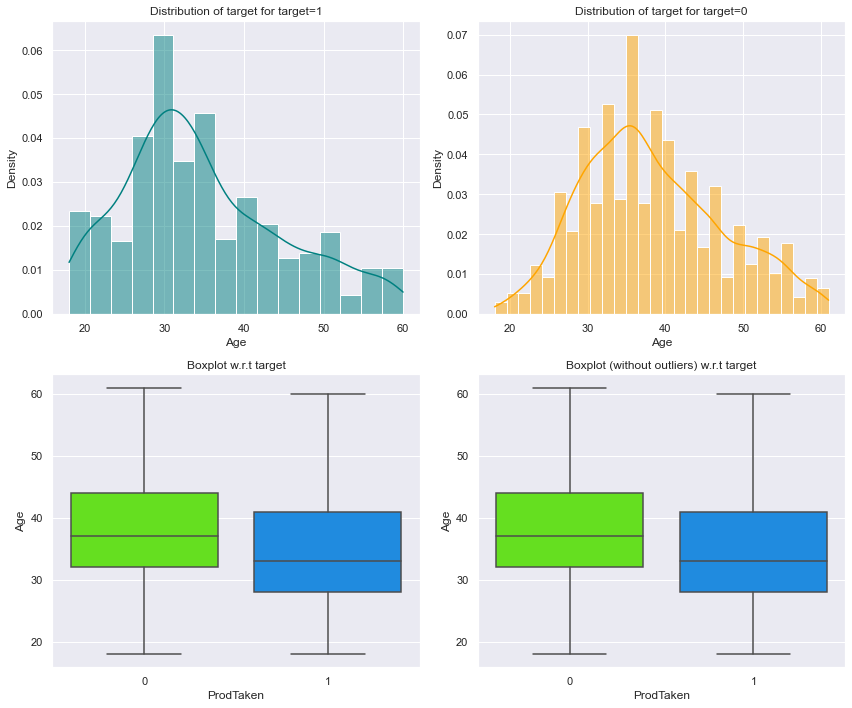

In [106]:
distribution_plot_wrt_target(data, "Age", "ProdTaken")

* The Age of the customers is mostly in 30-40 range. 
* in this range , most of the costumers who purchased one of the vacation package are averagely 30 years old.
* in this range , most of the costumers who has not purchased any of the vacation package are averagely 37 years old.
* There is no outliers in Age variables.

**'CityTier' vs 'ProdTaken'**

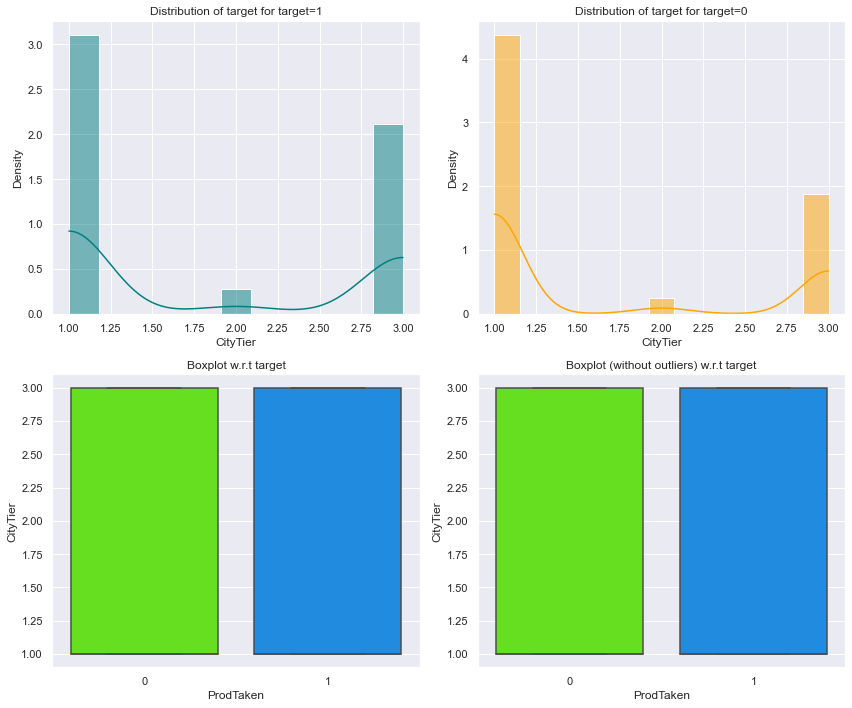

In [107]:
distribution_plot_wrt_target(data, "CityTier", "ProdTaken")

* There is no any meaningful comparison for CityTier varibale.

**'DurationOfPitch' vs 'ProdTaken'**

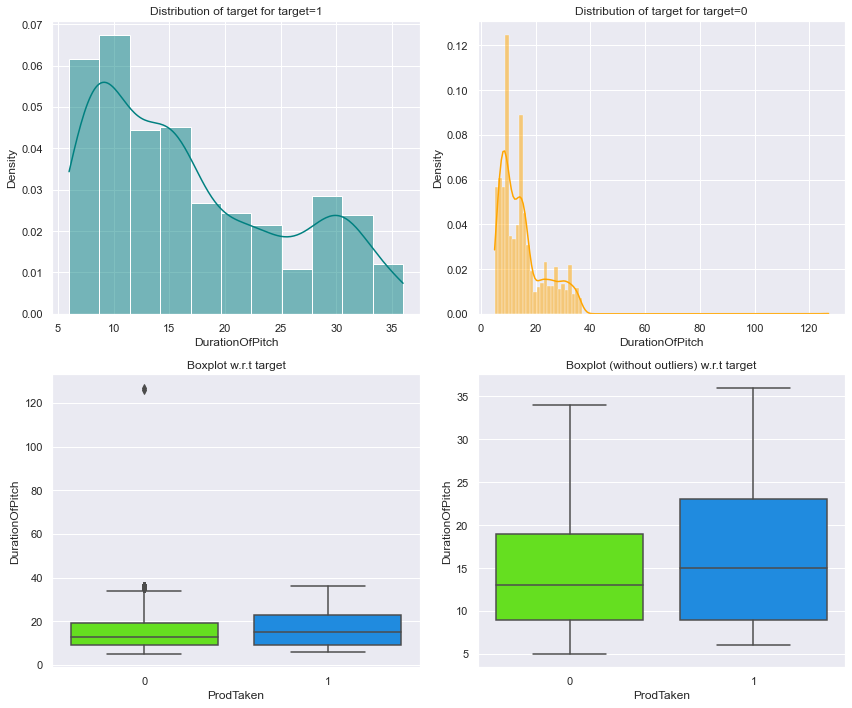

In [108]:
distribution_plot_wrt_target(data, "DurationOfPitch", "ProdTaken")

* Mostly DurationOfPitch score is in range of 5-20 for take one of the products.
* When we look at box plot without outliers, DurationOfPitch of costumers score is averagely 15 for ProdTaken=1 so higher than ProdTaken=0. So, when DurationOfPitch is higher, probability of purchasing product is getting higher.

**'NumberOfPersonVisiting' vs 'ProdTaken'**

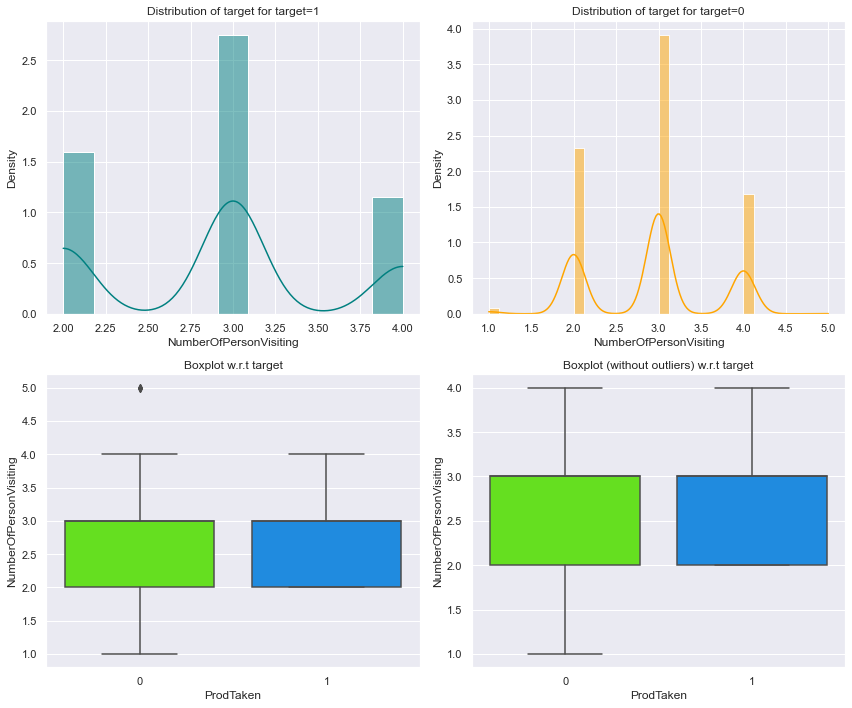

In [109]:
distribution_plot_wrt_target(data, "NumberOfPersonVisiting", "ProdTaken")

* Density of NumberOfPersonVisiting is approx 3 person
* There is no any meaningful comparison for NumberOfPersonVisiting varibale.

**'NumberOfFollowups' vs 'ProdTaken'**

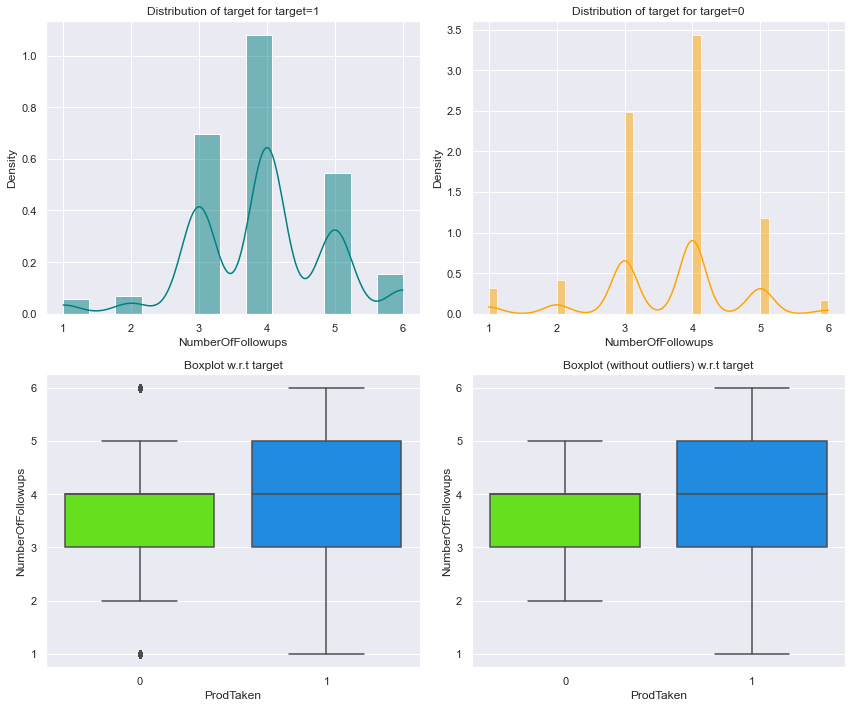

In [110]:
distribution_plot_wrt_target(data, "NumberOfFollowups", "ProdTaken")

* Density of NumberOfFollowups is approx 4 person
* When we look at box plot without outliers, NumberOfFollowups of costumers score is averagely 4 for ProdTaken=1 and 3.5 for ProdTaken=0 so higher than ProdTaken=0. So, when NumberOfFollowups is higher, probability of purchasing product is getting higher.

**'PreferredPropertyStar' vs 'ProdTaken'**

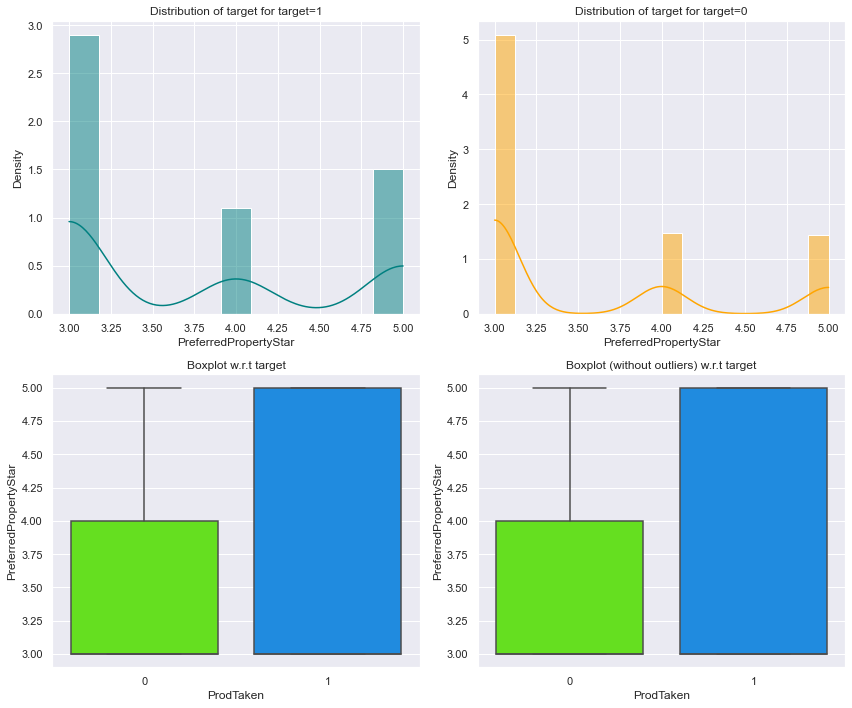

In [111]:
distribution_plot_wrt_target(data, "PreferredPropertyStar", "ProdTaken")

* Distribution of PreferredPropertyStar is right-skewed
* PreferredPropertyStar of costumers score is averagely 4 for ProdTaken=1 so higher than ProdTaken=0 (3.5). So, when PreferredPropertyStar is higher, probability of purchasing product is getting higher.

**'NumberOfTrips' vs 'ProdTaken'**

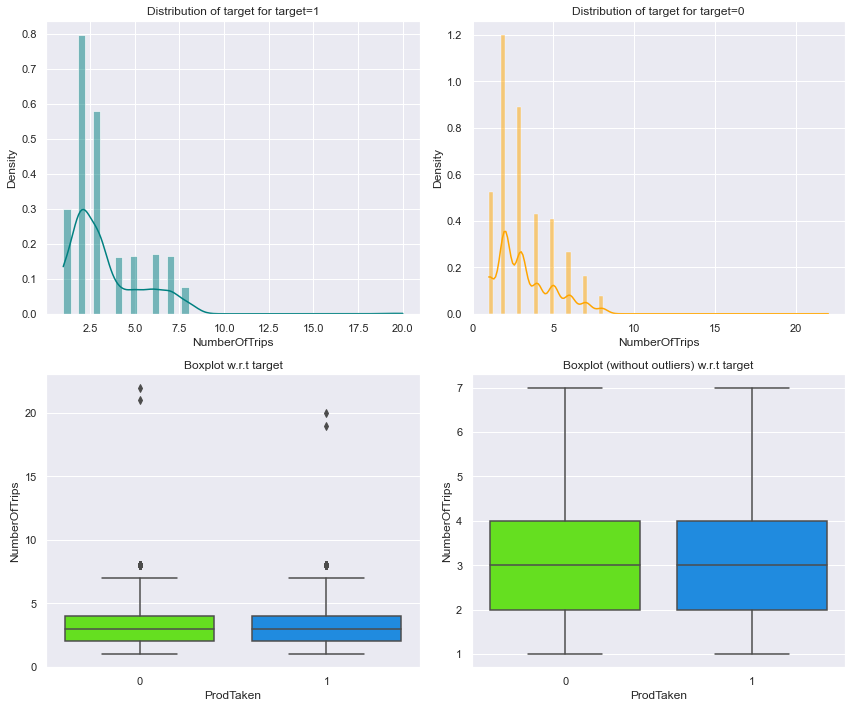

In [112]:
distribution_plot_wrt_target(data, "NumberOfTrips", "ProdTaken")

* Distribution of NumberOfTrips is right-skewed
* There is no any meaningful comparison for NumberOfTrips varibale.

**'PitchSatisfactionScore' vs 'ProdTaken'**

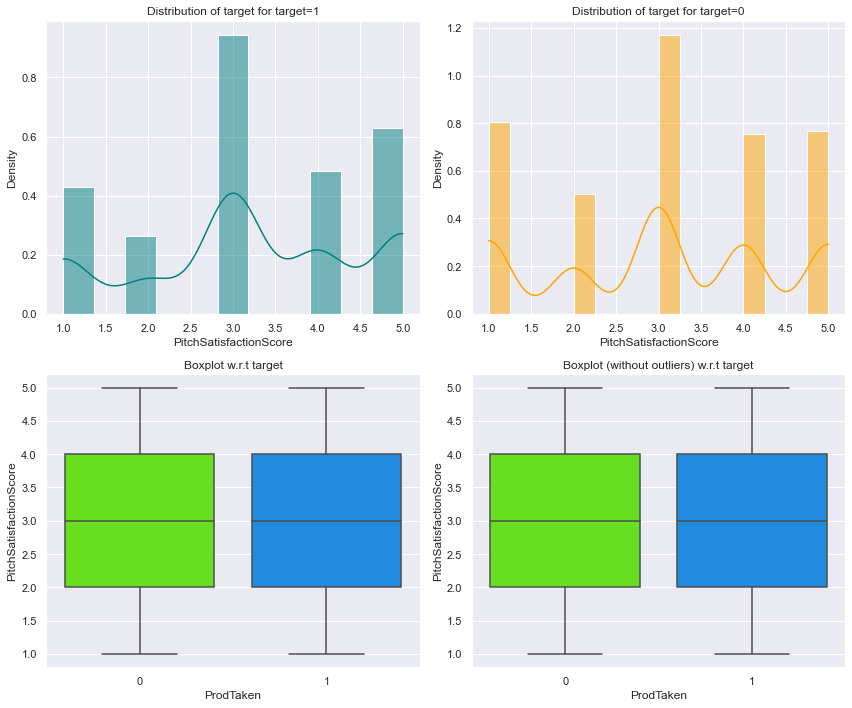

In [113]:
distribution_plot_wrt_target(data, "PitchSatisfactionScore", "ProdTaken")

* Distribution of PitchSatisfactionScore is normal and density of PitchSatisfactionScore is around 3.
* There is no any meaningful comparison for PitchSatisfactionScore varibale to purchase a product.

**'NumberOfChildrenVisiting' vs 'ProdTaken'**

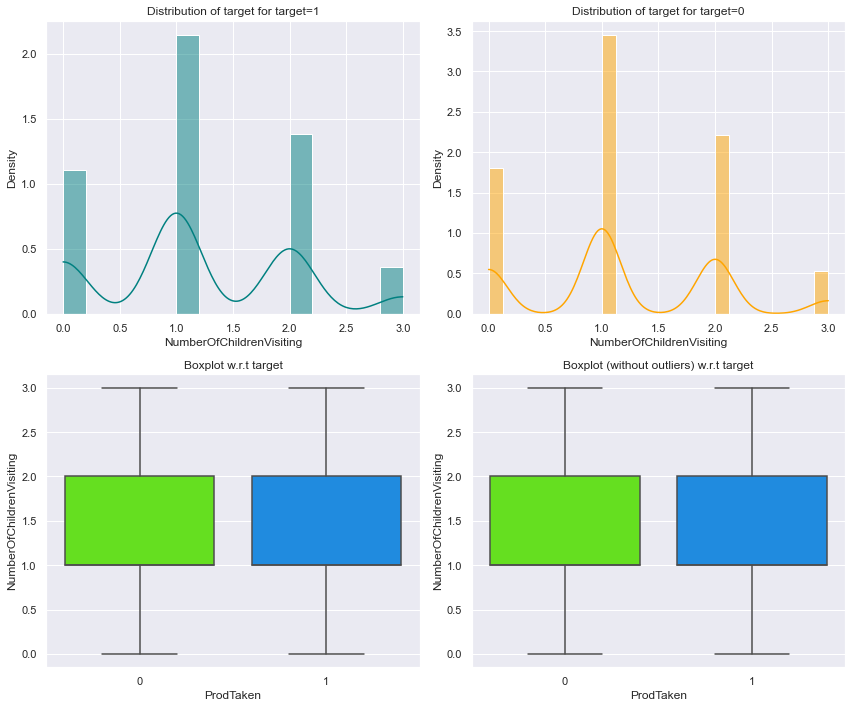

In [114]:
distribution_plot_wrt_target(data, "NumberOfChildrenVisiting", "ProdTaken")

* Distribution of NumberOfChildrenVisiting is normal and density of NumberOfChildrenVisiting is around 1.5
* There is no any meaningful comparison for PitchSatisfactionScore varibale to purchase a product.

**'NumberOfChildrenVisiting' vs 'ProdTaken'**

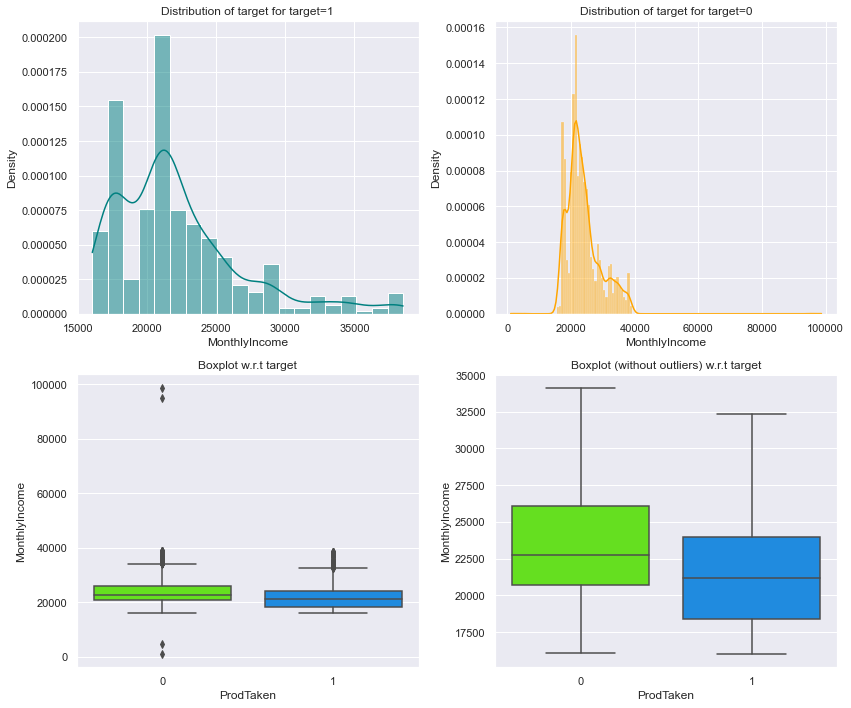

In [115]:
distribution_plot_wrt_target(data, "MonthlyIncome", "ProdTaken")

* Distribution of MonthlyIncome is right-skewed 
* MonthlyIncome is around 21000 dollar which costumer purchased a product, so less than 22500 which costumer has not purchased any product. So MonthlyIncome seems that less income affect more purchasing a product.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is "ProdTaken" which is representing the if costumer take a product or not and it is of int64 data type.
* There are some missing values in the dataset. and we will take care of the data preparation part below.

**Data Cleaning:**


* CostumerID variable has no meaningful effect so it is dropped from the data.

**Observations from EDA:**

* `Age`: The Age has an approx symmetric distribution with mean 37 
* `DurationOfPitch`: DurationOfPitch is not symmetrically distributed, so right scewed.
* `NumberOfTrips`: NumberOfTrips is not symmetrically distributed, so right scewed. Mean of the NumberOfTrips is approx 3
* `MonthlyIncome`:  MonthlyIncome has a right-skewed distribution. Distribution is not symmetric but mean is approx 23000. The range of values is very large with many observations being less than 1000 and some being greater than 98000
* `CityTier`: CityTier has a right-skewed distribution. Distribution is not symmetric but mean is approx 1.7
* `NumberOfPersonVisiting`: NumberOfPersonVisiting seems normal distribution. Distribution is symmetric and mean is approx 2.9. Seems There is some low outliers of this variables.
* `NumberOfFollowups`: NumberOfFollowups seems normal distribution. Distribution is symmetric and mean is approx 3.7. Seems There is some low and high outliers of this variables.
* `PreferredPropertyStar`: PreferredPropertyStar has a right-skewed distribution. Distribution is not symmetric but mean is approx 3.5. There is no outliers in this variable
* `NumberOfTrips`: NumberOfTrips has a right-skewed distribution. Distribution is not symmetric but mean is approx 3.2. There are some high outliers in this variable
* `PitchSatisfactionScore`: PitchSatisfactionScore has normal distribution. Distribution is symmetric and mean is approx 3. There no outliers in this variable
* `NumberOfChildrenVisiting`: NumberOfChildrenVisiting has normal distribution. Distribution is symmetric and mean is approx 1. There no outliers in this variable
* `Passport`: 70.9% of Costumer has no Passport
* `OwnCar`: 62% of Costumer has car.
* `TypeofContact`: Self Enquiry is 70.5% observations in the data
* `Occupation`: Salaried and Small Business observation is most common occupations of the costumer portfolio, 48.4% and 42.6% respectively
* `Gender`: Major sex of the comstumer portfolio is Male and about 60%
* `MaritalStatus`: Majority (47.9%) of the costumer marital status is Married
* `Designation`: Executive and Manager has the highest percentage of observations respectively 37.7% and 35.4%.
* `ProductPitched`: Basic and Deluxe packages have the highest percentage of observations respectively 37.7% and 35.4%. ProductPitched reulst seems excatly the same distribution as Designation

**Bivariate Observations: ** 

* **'TypeofContact' vs 'ProdTaken'**
     * 21.85% of costumer who is Company Invited purchased one of the vacation package
     * 17.62 % of costumer who is Self Enquiry  purchased one of the vacation package
     
* **'Occupation' vs 'ProdTaken'**
    - 27.65% of costumer who has a Large Business purchased one of the vacation package
    - 17.48 % of costumer who is Salaried person purchased one of the vacation package
    - 18.43 % of costumer who has a Small Business purchased one of the vacation package
    - 100 % of costumer who is Freelancer purchased one of the vacation package but there is only 2 freelancer in dataset.
 
* **'Gender' vs 'ProdTaken'**
    - 17.34% of Female costumers purchased one of the vacation package
    - 19.82 % of Male costumers purchased one of the vacation package.
    
* **'MaritalStatus' vs 'ProdTaken'**
    - 13.05% of Divorced costumers purchased one of the vacation package
    - 13.93 % of Married costumers purchased one of the vacation package
    - 33.19% of Single costumers purchased one of the vacation package
    - 24.34 % of Unmarried costumers purchased one of the vacation package
    
* **'Designation' vs 'ProdTaken'**
    - 5.85% of costumers whose designation is AVP has purchased one of the vacation package
    - 29.97% of costumers whose designation is Executive has purchased one of the vacation package
    - 11.78% of costumers whose designation is Manager has purchased one of the vacation package
    - 16.71% of costumers whose designation is Senior Manager has purchased one of the vacation package
    - 8.70% of costumers whose designation is VP has purchased one of the vacation package
    
* **'ProductPitched' vs 'ProdTaken'**
    - 29.97% of costumers has purchased Basic package
    - 11.78% of costumers has purchased Deluxe package
    - 8.70% of costumers has purchased King package
    - 16.71% of costumers has purchased Standard package
    - 5.85% of costumers has purchased Super Deluxe package
    
* **'Age' vs 'ProdTaken'**
    * The Age of the customers is mostly in 30-40 range. 
    * in this range , most of the costumers who purchased one of the vacation package are averagely 30 years old.
    * in this range , most of the costumers who has not purchased any of the vacation package are averagely 37 years old.
    * There is no outliers in Age variables.
    
* **'CityTier' vs 'ProdTaken'**
    * There is no any meaningful comparison for CityTier varibale.

* **'DurationOfPitch' vs 'ProdTaken'**
    * Mostly DurationOfPitch score is in range of 5-20 for take one of the products.
    * When we look at box plot without outliers, DurationOfPitch of costumers score is averagely 15 for ProdTaken=1 so higher than ProdTaken=0. So, when DurationOfPitch is higher, probability of purchasing product is getting higher.
    
* **'NumberOfPersonVisiting' vs 'ProdTaken'**
    * Density of NumberOfPersonVisiting is approx 3 person
    * There is no any meaningful comparison for NumberOfPersonVisiting varibale.

* **'NumberOfFollowups' vs 'ProdTaken'**
    * Density of NumberOfFollowups is approx 4 person
    * When we look at box plot without outliers, NumberOfFollowups of costumers score is averagely 4 for ProdTaken=1 and 3.5 for ProdTaken=0 so higher than ProdTaken=0. So, when NumberOfFollowups is higher, probability of purchasing product is getting higher.
    
    
* **'PreferredPropertyStar' vs 'ProdTaken'**
    * Distribution of PreferredPropertyStar is right-skewed
    * PreferredPropertyStar of costumers score is averagely 4 for ProdTaken=1 so higher than ProdTaken=0 (3.5). So, when PreferredPropertyStar is higher, probability of purchasing product is getting higher.
    
* **'NumberOfTrips' vs 'ProdTaken'**
    * Distribution of NumberOfTrips is right-skewed
    * There is no any meaningful comparison for NumberOfTrips varibale.
    
* **'PitchSatisfactionScore' vs 'ProdTaken'**
    * Distribution of PitchSatisfactionScore is normal and density of PitchSatisfactionScore is around 3.
    * There is no any meaningful comparison for PitchSatisfactionScore varibale to purchase a product.
    
* **'NumberOfChildrenVisiting' vs 'ProdTaken'**
    * Distribution of NumberOfChildrenVisiting is normal and density of NumberOfChildrenVisiting is around 1.5
    * There is no any meaningful comparison for PitchSatisfactionScore varibale to purchase a product.
    
* **'MonthlyIncome' vs 'ProdTaken'**
    * Distribution of MonthlyIncome is right-skewed 
    * MonthlyIncome is around 21000 dollar which costumer purchased a product, so less than 22500 which costumer has not purchased any product. So MonthlyIncome seems that less income affect more purchasing a product.

### Data Preparation

In [147]:
data1= data.copy()
data1.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [148]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [149]:
data1.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [150]:
data1.dropna(inplace= True)

In [151]:
data1.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [152]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4128 non-null   int64  
 1   Age                       4128 non-null   float64
 2   TypeofContact             4128 non-null   object 
 3   CityTier                  4128 non-null   int64  
 4   DurationOfPitch           4128 non-null   float64
 5   Occupation                4128 non-null   object 
 6   Gender                    4128 non-null   object 
 7   NumberOfPersonVisiting    4128 non-null   int64  
 8   NumberOfFollowups         4128 non-null   float64
 9   ProductPitched            4128 non-null   object 
 10  PreferredPropertyStar     4128 non-null   float64
 11  MaritalStatus             4128 non-null   object 
 12  NumberOfTrips             4128 non-null   float64
 13  Passport                  4128 non-null   int64  
 14  PitchSat

In [154]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data1[i].value_counts())
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       2918
Company Invited    1210
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          1999
Small Business    1746
Large Business     381
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2463
Female    1665
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1615
Deluxe          1422
Standard         737
Super Deluxe     250
King             104
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      1990
Divorced      789
Unmarried     682
Single        667
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executive         1615
Man

**Converting Object Data to int64 Number Data for *TypeofContact * column **

In [158]:
data1.TypeofContact.unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

In [167]:
# converting
data1.TypeofContact = data1.TypeofContact.apply(lambda x: 1 if x == "Self Enquiry" else 2)
data1.TypeofContact.dtype

dtype('int64')

**Converting Object Data to int64 Number Data for *Occupation* column **

In [173]:
data1.Occupation.unique()

In [168]:
# converting
data1.Occupation = data1.Occupation.apply(lambda x: 1 if x == "Free Lancer" else x)
data1.Occupation = data1.Occupation.apply(lambda x: 2 if x == "Salaried" else x)
data1.Occupation = data1.Occupation.apply(lambda x: 3 if x == "Small Business" else x)
data1.Occupation = data1.Occupation.apply(lambda x: 4 if x == "Large Business" else x)
data1.Occupation.dtype

dtype('int64')

 **Converting Object Data to int64 Number Data for *Gender* column **

In [174]:
data1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [175]:
# converting
data1.Gender = data1.Gender.apply(lambda x: 1 if x == "Female" else x)
data1.Gender = data1.Gender.apply(lambda x: 2 if x == "Male" else x)
data1.Gender.dtype

dtype('int64')

 **Converting Object Data to int64 Number Data for *ProductPitched* column **

In [176]:
data1.ProductPitched.unique()

array(['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [177]:
# converting
data1.ProductPitched = data1.ProductPitched.apply(lambda x: 1 if x == "Basic" else x)
data1.ProductPitched = data1.ProductPitched.apply(lambda x: 2 if x == "Deluxe" else x)
data1.ProductPitched = data1.ProductPitched.apply(lambda x: 3 if x == "Standard" else x)
data1.ProductPitched = data1.ProductPitched.apply(lambda x: 4 if x == "Super Deluxe" else x)
data1.ProductPitched = data1.ProductPitched.apply(lambda x: 5 if x == "King" else x)
data1.ProductPitched.dtype

dtype('int64')

**Converting Object Data to int64 Number Data for *MaritalStatus* column **

In [178]:
data1.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [179]:
# converting
data1.MaritalStatus = data1.MaritalStatus.apply(lambda x: 1 if x == "Single" or x == "Unmarried" else x)
data1.MaritalStatus = data1.MaritalStatus.apply(lambda x: 2 if x == "Married" else x)
data1.MaritalStatus = data1.MaritalStatus.apply(lambda x: 3 if x == "Divorced" else x)
data1.MaritalStatus.dtype

dtype('int64')

**Converting Object Data to int64 Number Data for *Designation* column **

In [180]:
data1.Designation.unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [184]:
# converting
data1.Designation = data1.Designation.apply(lambda x: 1 if x == "Manager" else x)
data1.Designation = data1.Designation.apply(lambda x: 2 if x == "Executive" else x)
data1.Designation = data1.Designation.apply(lambda x: 3 if x == "Senior Manager" else x)
data1.Designation = data1.Designation.apply(lambda x: 4 if x == "AVP" else x)
data1.Designation = data1.Designation.apply(lambda x: 5 if x == "VP" else x)
data1.Designation.dtype

dtype('int64')

In [185]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4128 non-null   int64  
 1   Age                       4128 non-null   float64
 2   TypeofContact             4128 non-null   int64  
 3   CityTier                  4128 non-null   int64  
 4   DurationOfPitch           4128 non-null   float64
 5   Occupation                4128 non-null   int64  
 6   Gender                    4128 non-null   int64  
 7   NumberOfPersonVisiting    4128 non-null   int64  
 8   NumberOfFollowups         4128 non-null   float64
 9   ProductPitched            4128 non-null   int64  
 10  PreferredPropertyStar     4128 non-null   float64
 11  MaritalStatus             4128 non-null   int64  
 12  NumberOfTrips             4128 non-null   float64
 13  Passport                  4128 non-null   int64  
 14  PitchSat

In [186]:
data1.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,1,3,6.0,2,1,3,3.0,2,3.0,1,1.0,1,2,1,0.0,1,20993.0
1,0,49.0,2,1,14.0,2,2,3,4.0,2,4.0,3,2.0,0,3,1,2.0,1,20130.0
2,1,37.0,1,1,8.0,1,2,3,4.0,1,3.0,1,7.0,1,3,0,0.0,2,17090.0
3,0,33.0,2,1,9.0,2,1,2,3.0,1,3.0,3,2.0,1,5,1,1.0,2,17909.0
5,0,32.0,2,1,8.0,2,2,3,3.0,1,3.0,1,1.0,0,5,1,1.0,2,18068.0


## Split the dataset

In [244]:
# Separating features and the target column
X = data1.drop('ProdTaken', axis=1)
y = data1['ProdTaken']

In [245]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [246]:
X_train.shape, X_test.shape

((2889, 18), (1239, 18))

- We have 2889 observations in the train set and 1239 observations in the test set.

## Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

### Easy Using Methods For Model Building

In [247]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [248]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [249]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [250]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [251]:
# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# For pandas profiling
from pandas_profiling import ProfileReport

## Decision Tree Model

In [252]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [253]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Checking model performance on training set

In [254]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


#### Checking model performance on test set

In [255]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.292494  0.085553   0.467226        0.459366   inf


- The Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### Hyperparameter Tuning

In [256]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, random_state=1)

In [257]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


In [258]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.294471  0.087772   0.460001        0.452034   inf


- After tuning, nothing is improved.

**Plotting the feature importance of each variable**

In [259]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
DurationOfPitch           0.129031
Age                       0.109915
MonthlyIncome             0.103535
ProductPitched            0.083942
NumberOfTrips             0.076461
MaritalStatus             0.071705
Passport                  0.070509
Gender                    0.058879
NumberOfFollowups         0.056543
CityTier                  0.050945
PitchSatisfactionScore    0.044455
PreferredPropertyStar     0.039185
Occupation                0.029921
TypeofContact             0.020900
Designation               0.017620
NumberOfPersonVisiting    0.015089
NumberOfChildrenVisiting  0.011122
OwnCar                    0.010244


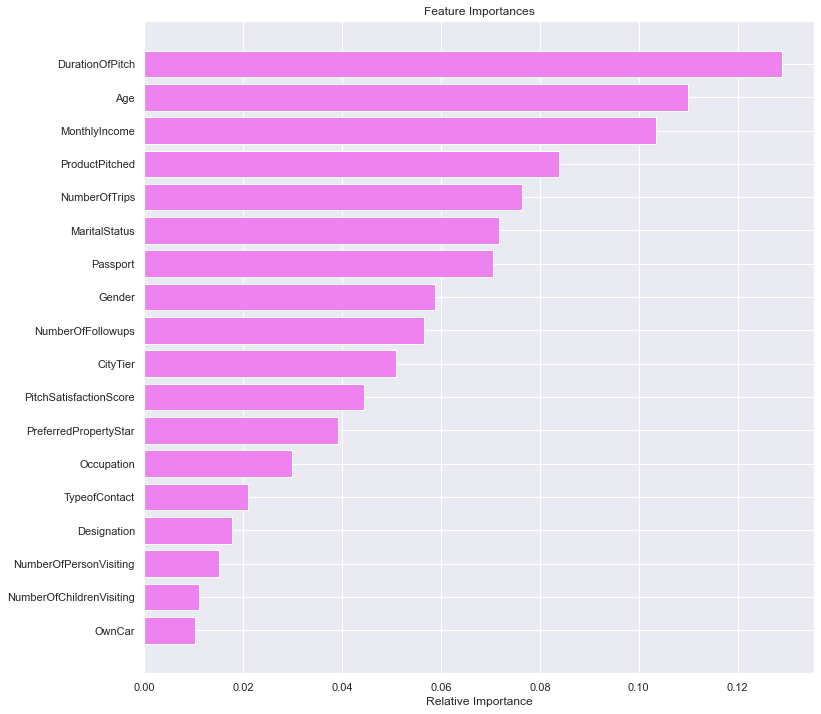

In [260]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- DurationOfPitch is the most important feature, in addition to Age and MonthlyIncome, for tuned decision tree model

## Random Forest Model

In [261]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [262]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.089249  0.054517   0.948178        0.947853   inf


In [263]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.237332  0.151122    0.64923        0.644055   inf


- Random forest is giving a good r2 score of 64% on the test data but it is likely overfitting the train data.
- Let's try to reduce this overfitting by hyperparameter tuning.

### Hyperparameter Tuning

In [264]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, random_state=1)

In [265]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.089249  0.054517   0.948178        0.947853   inf


In [266]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.237332  0.151122    0.64923        0.644055   inf


- No significant change in the result. The result is almost the same before or after the hyperparameter tuning.

In [267]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Age                       0.142610
DurationOfPitch           0.130856
MonthlyIncome             0.125032
ProductPitched            0.077699
Passport                  0.070700
NumberOfTrips             0.061330
PitchSatisfactionScore    0.056895
MaritalStatus             0.054893
NumberOfFollowups         0.051029
CityTier                  0.042920
Occupation                0.036489
PreferredPropertyStar     0.034379
Gender                    0.025528
TypeofContact             0.020829
NumberOfChildrenVisiting  0.020028
NumberOfPersonVisiting    0.018220
Designation               0.016119
OwnCar                    0.014445


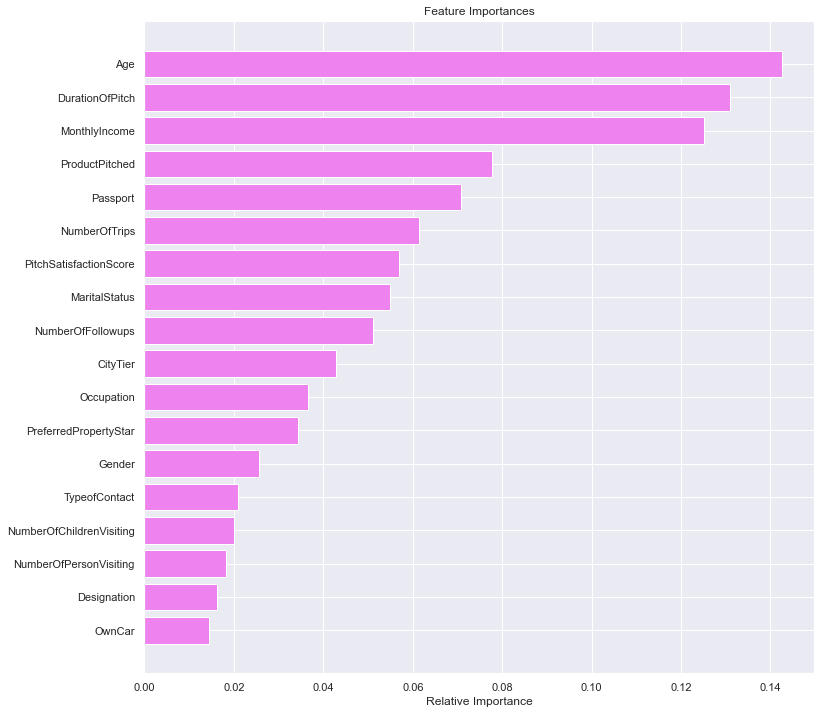

In [268]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Age is the most important feature, in addition to DurationOfPitch and MonthlyIncome, for the tuned random forest model.

## Boosting Models

### AdaBoost Regressor

In [269]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [270]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

Training performance 
       RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  0.34671  0.27615   0.217931        0.213026   inf


In [271]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.359071  0.286297   0.197086         0.18524   inf


- AdaBoost is generalizing well but it is giving very poor performance, in terms of r2 score as well as RMSE, as compared to the decision tree and random forest model.  

### Hyperparameter Tuning

In [272]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=90, random_state=1)

In [273]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.345078  0.254413   0.225276        0.220417   inf


In [274]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_train_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.345078  0.254413   0.225276        0.220417   inf


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [275]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Passport                  0.321266
ProductPitched            0.241013
Age                       0.115643
MaritalStatus             0.102997
DurationOfPitch           0.062503
CityTier                  0.044585
NumberOfFollowups         0.029623
MonthlyIncome             0.025624
PreferredPropertyStar     0.019807
Designation               0.015037
Occupation                0.008730
PitchSatisfactionScore    0.006237
NumberOfTrips             0.004044
NumberOfPersonVisiting    0.001805
TypeofContact             0.001085
Gender                    0.000000
OwnCar                    0.000000
NumberOfChildrenVisiting  0.000000


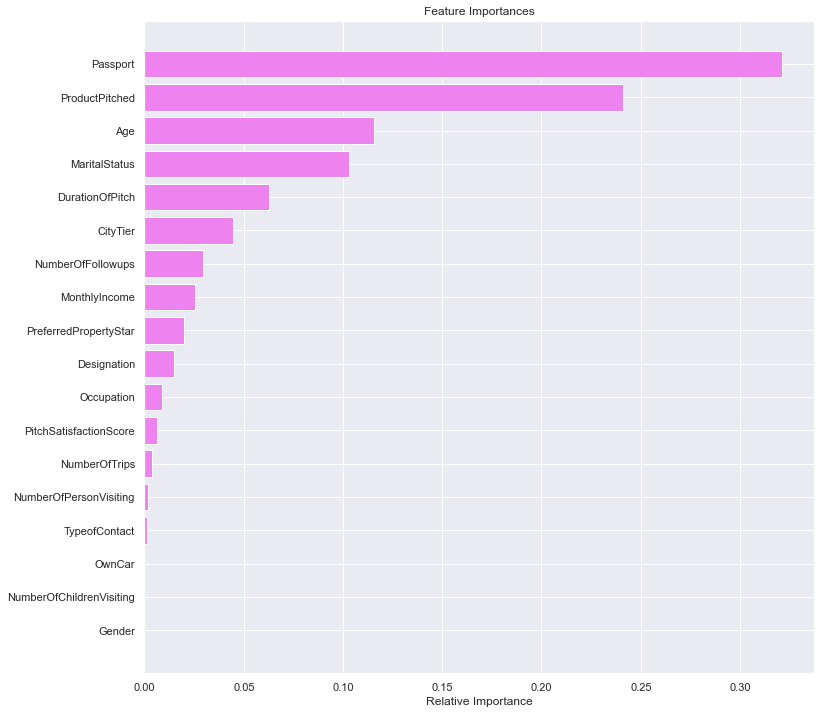

In [276]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport is the most important feature here, followed by ProductPitched and Age.

### Gradient Boosting Regressor

In [277]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [278]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.289706  0.199212   0.453954        0.450529   inf


In [279]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.318793  0.219341   0.367114        0.357777   inf


- Gradient boosting is generalizing well and giving decent results but not as good performance as random forest, its very poor performance.

### Hyperparameter Tuning

In [280]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=0.7, n_estimators=175,
                          random_state=1, subsample=1)

In [281]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.001803  0.001136   0.999979        0.999979   inf


In [282]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.204688  0.105004   0.739089        0.735239   inf


- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increased by approx 100% from 0.36 to 0.73 on the test data.
- RMSE has decreased by more than 10 for the test data and more than 25 for training data.

In [283]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
DurationOfPitch           0.135950
Age                       0.135693
MonthlyIncome             0.127559
Passport                  0.084851
ProductPitched            0.067107
PitchSatisfactionScore    0.060869
NumberOfTrips             0.058440
CityTier                  0.051259
MaritalStatus             0.049781
NumberOfFollowups         0.042299
PreferredPropertyStar     0.039118
Occupation                0.033710
Gender                    0.028375
TypeofContact             0.024726
NumberOfPersonVisiting    0.017083
NumberOfChildrenVisiting  0.015965
Designation               0.014327
OwnCar                    0.012886


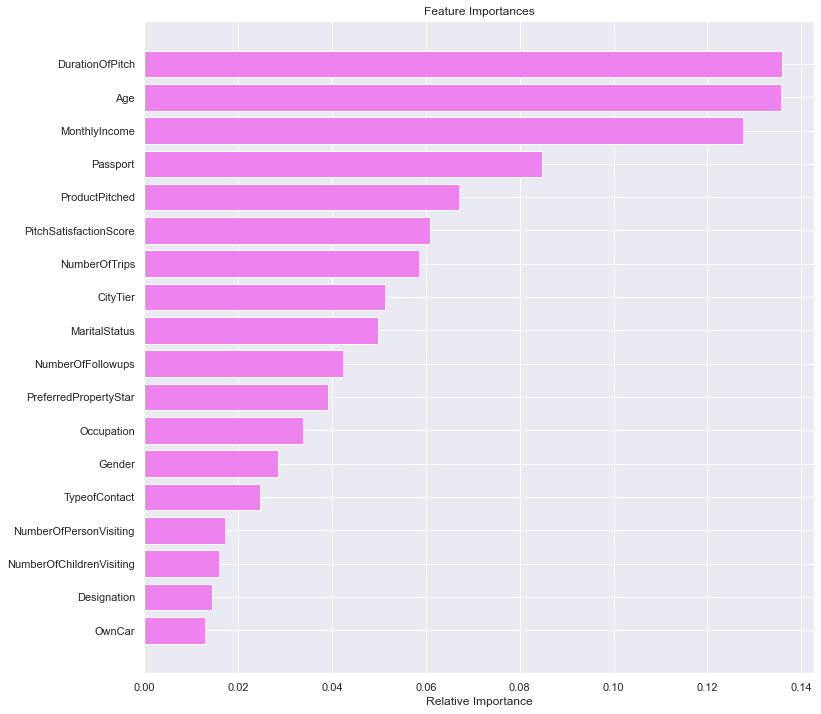

In [284]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- DurationOfPitch is the most important feature
- Age, MonthlyIncome have almost equal importance 

### XGBoost Regressor

In [285]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.062322  0.038877   0.974731        0.974572   inf


In [287]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.229781  0.139286   0.671198        0.666347   inf


- XGBoost with default parameters is giving almost as good results as the tuned gradient boosting model.

### Hyperparameter Tuning

In [289]:
# Choose the type of classifier. 
xgb_tuned = XGBRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1],
              'n_jobs': [10,20,30,50]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=10, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [290]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.039759  0.026736   0.989715        0.989651   inf


In [291]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.242303  0.150722   0.634383        0.628989   inf


In [292]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
ProductPitched            0.133676
Passport                  0.131394
MaritalStatus             0.083064
CityTier                  0.066882
PreferredPropertyStar     0.064124
Occupation                0.053275
PitchSatisfactionScore    0.051850
NumberOfFollowups         0.051127
DurationOfPitch           0.050328
Age                       0.044505
Designation               0.043931
TypeofContact             0.040840
Gender                    0.039267
NumberOfTrips             0.036652
MonthlyIncome             0.035928
NumberOfPersonVisiting    0.027481
OwnCar                    0.024374
NumberOfChildrenVisiting  0.021302


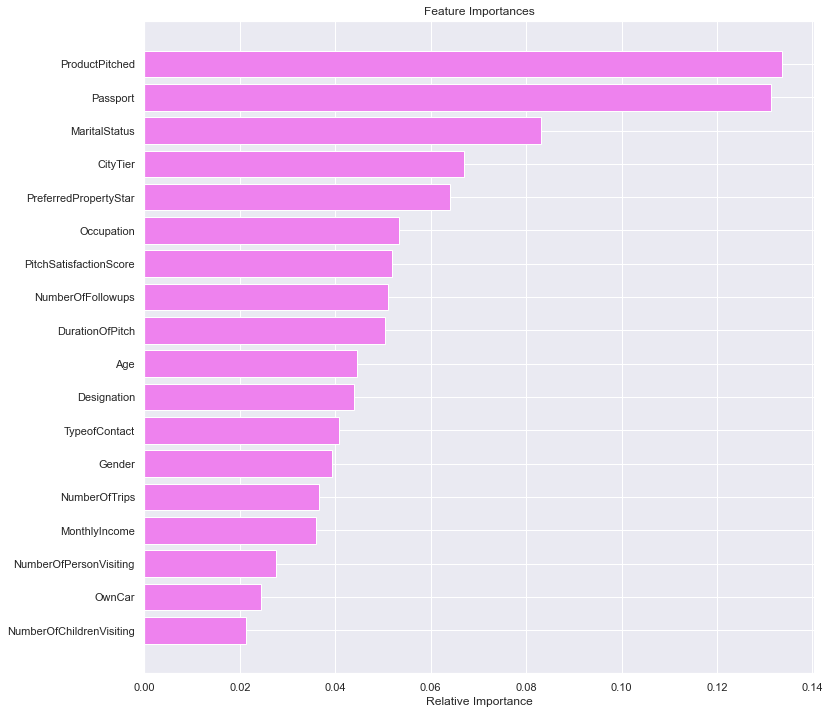

In [293]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In XGBoost, ProductPitched is the most important feature followed by features - Passport and MaritalStatus

## Stacking Model

**Now, build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [295]:
# StackingRegressor()

In [296]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [297]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=17,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features=None,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=10,
                                                         max_features=0.7,
                                                         n_estimators=175,
                                                         random_state=1,
                                                         subsample=1))],
                  final_estimator=XGBRegressor(base_score=None, booste...
                                               importance_type='gain',
                                   

In [298]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.016916  0.004288   0.998138        0.998127   inf


In [299]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.243961  0.099383   0.629363        0.623894   inf


## Comparing all models

In [300]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
RMSE,0.0,0.022786,0.089249,0.089249,0.346710,0.345078,0.289706,0.001803,0.062322,0.039759,0.016916
MAE,0.0,0.001038,0.054517,0.054517,0.276150,0.254413,0.199212,0.001136,0.038877,0.026736,0.004288
R-squared,1.0,0.996622,0.948178,0.948178,0.217931,0.225276,0.453954,0.999979,0.974731,0.989715,0.998138
Adj. R-squared,1.0,0.996601,0.947853,0.947853,0.213026,0.220417,0.450529,0.999979,0.974572,0.989651,0.998127
MAPE,0.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [301]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
RMSE,0.292494,0.294471,0.237332,0.237332,0.359071,0.353939,0.318793,0.204688,0.229781,0.242303,0.243961
MAE,0.085553,0.087772,0.151122,0.151122,0.286297,0.259267,0.219341,0.105004,0.139286,0.150722,0.099383
R-squared,0.467226,0.460001,0.649230,0.649230,0.197086,0.219872,0.367114,0.739089,0.671198,0.634383,0.629363
Adj. R-squared,0.459366,0.452034,0.644055,0.644055,0.185240,0.208362,0.357777,0.735239,0.666347,0.628989,0.623894
MAPE,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


- The tuned gradient boosting model is the best model here. It has the highest r2 score of approx 73.9% and the lowest RMSE of approx 20 on the test data. 
- XGB, Tuned XGB, and Stacking regressor are the top 3 models. They are all giving a closer performance on testset.

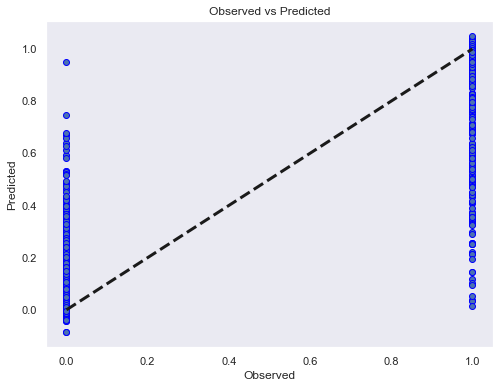

In [302]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on 0 and 1 score where predicted is equal to the observed 
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

DurationOfPitch           0.135950
Age                       0.135693
MonthlyIncome             0.127559
Passport                  0.084851
ProductPitched            0.067107
PitchSatisfactionScore    0.060869
NumberOfTrips             0.058440
CityTier                  0.051259
MaritalStatus             0.049781
NumberOfFollowups         0.042299
PreferredPropertyStar     0.039118
Occupation                0.033710
Gender                    0.028375
TypeofContact             0.024726
NumberOfPersonVisiting    0.017083
NumberOfChildrenVisiting  0.015965
Designation               0.014327
OwnCar                    0.012886

##  Business Recommendations

- We can use this predictive model for any sale campaign and can predict the potential costumers who will purchase one of the company's vacation package with 99% prediction on trainin data and 73.9% on test data. The ability to predict potential costumers, sale department can manage advertisement and campaign event more efficiently and cost-effectively.

- DurationOfPitch, Age and MonthlyIncome is most efective and important features to predict potential for the choosen tuned gradient boosting model, if we can work on this feature to improve scores on test data, we would get better results on test set also.

- most of the costumers who purchased one of the vacation package are averagely 30 years old and most of the costumers who has not purchased any of the vacation package are averagely 37 years old. and Age is most efective feature to sell vacation pakage, so if the sales department would focus on younger generations with a package which meets their expectations, would be more productive sale campaign for the sale department.

- if we can add more higher PreferredPropertyStar vacation places , Costumer's probability of purchasing product is getting higher. so company would offer more attractive places for every packages to costumers purchase.

- 29.97% of total sale is Basic Package sale. so if the sale department focus on why people usually prefer to purchase basic model and improve the other package coverages, then they would increase sales for other model also. investigating what is most effective features to sell for Basic package than others, maybe price, may be costumer expectations, may be places hotel city, i.e., would increase selling other vacation package and revenue eventually.

- 29.97% of costumers whose designation is Executive has purchased one of the vacation package, so it's the same portion with Basic package, that means, sale department target potential costumers would be Executives people. Sale person would call more Executive person than other to offer with different flexibe package. that would increase the sale also. 